# Preparing Data

In [1]:
#importing all necessary files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [4]:
#load files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print("train size:",train.shape)
print("test size:",test.shape)

train size: (42000, 785)
test size: (28000, 784)


In [8]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

## Data Preprocessing

In [9]:
# separate fiture and label
x = train.drop("label", axis=1) 
y = train.label

In [10]:
# Reshape the images using to_numpy() and normalize the pixel values
x = x.to_numpy().reshape(-1, 28, 28, 1)  # Reshape into (28, 28, 1)
x = x / 255.0  # Normalize pixel values to [0, 1]

In [11]:
# Normalize test images (no labels for test set)
test_images = test.to_numpy().reshape(-1, 28, 28, 1)
test_images = test_images / 255.0

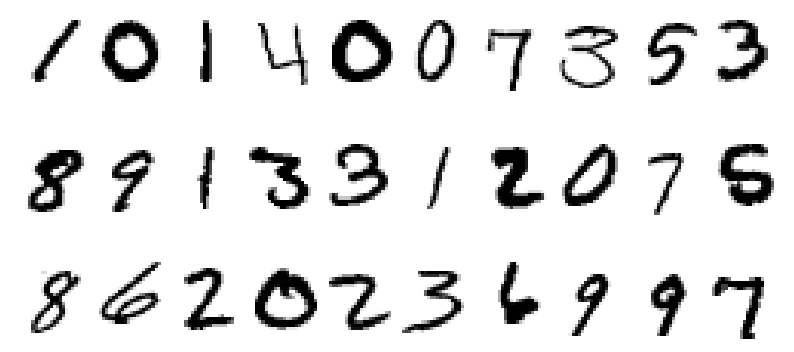

In [12]:
plt.figure(figsize=(10, 5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(x[i, :, :, 0], cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

#  Building CNN Architecture

In [13]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x)

In [14]:
# Define CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same')
#     layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same')
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'), 
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


#  Model Training

In [15]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
# Split data manually into training and validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Training model with augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_val, y_val),
#                     callbacks=[learning_rate_reduction, early_stopping]
         )

Epoch 1/50


C:\Users\DEEPANSHU\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 33s 59ms/step - accuracy: 0.5874 - loss: 1.1547 - val_accuracy: 0.9829 - val_loss: 0.0595
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9550 - loss: 0.1557 - val_accuracy: 0.9861 - val_loss: 0.0468
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9692 - loss: 0.1064 - val_accuracy: 0.9895 - val_loss: 0.0326
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - accuracy: 0.9743 - loss: 0.0856 - val_accuracy: 0.9906 - val_loss: 0.0330
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9797 - loss: 0.0695 - val_accuracy: 0.9924 - val_loss: 0.0243
Epoch 6/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9822 - loss: 0.0639 - val_accuracy: 0.9912 - val_loss: 0.0264
Epoch 7/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9819 - loss: 0.0636 - val_accuracy: 0.9924 - val_loss: 0.0247
Epoch 8/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9846 - loss: 0.0590 - val_accurac

In [17]:
# Evaluate the model on the validation data 
val_loss, val_acc = model.evaluate(x, y)
print(f"Validation accuracy: {val_acc}")
print(f"Validation loss: {val_loss}")

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9972 - loss: 0.0115
Validation accuracy: 0.9972142577171326
Validation loss: 0.01134654600173235


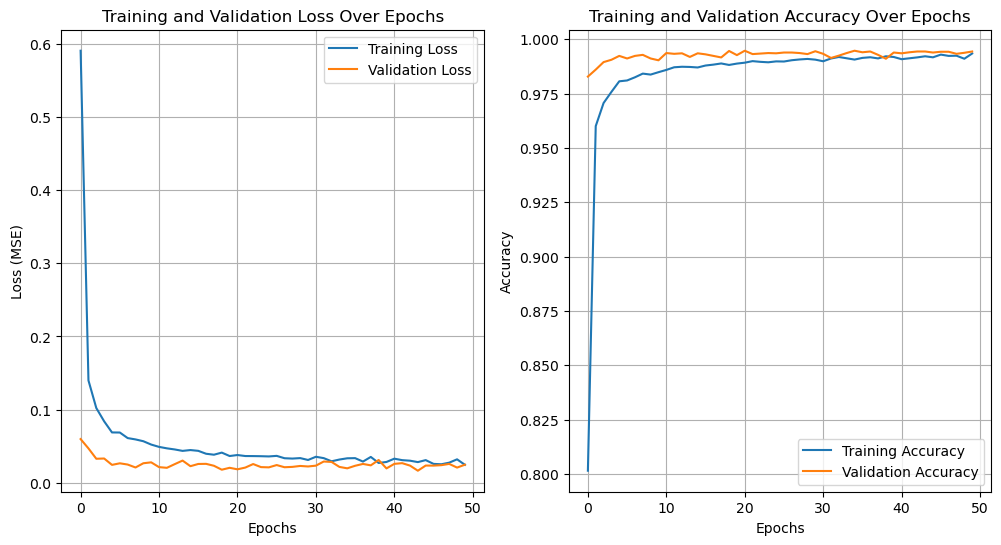

In [18]:
# Plot accuracy vs epoch
# Plot Loss
plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#  Evaluation and Prediction



In [19]:
# Predict on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step


In [20]:
# Optional: Visualize some predictions
def plot_image(i, predictions_array, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array[i])
    plt.xlabel(f"Predicted: {predicted_label}", color="blue")

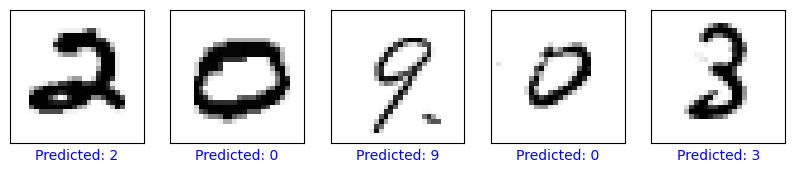

In [21]:
# Visualize the first 5 test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plot_image(i, predictions, test_images)
plt.show()